In [5]:
import pandas as pd
import numpy as np
import sklearn as sk
import pandas_profiling
import sys,os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas.api.types as ptypes
from numpy.random import choice
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import random
from random import randrange
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import  matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')



import statsmodels.api as sm

E:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Read the data

In [6]:
df=pd.read_csv('./amit/data.csv')
print(df.columns)
df.head()
df.shape

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


(569, 32)

In [7]:
def load_data():
    df=pd.read_csv('./amit/data.csv')
    df['diagnosis'] =df['diagnosis'].apply(lambda x: 1 if x =="M" else 0)
    y = df['diagnosis']
    X = df.drop(['diagnosis','id'],axis=1)
    return X,y
X,y =load_data()
feature_cols = X.columns.to_list()


In [8]:
feature_stats = X.describe().T[['mean','std','max','min']]
df['diagnosis'] =df['diagnosis'].apply(lambda x: 1 if x =="M" else 0)
corr_matrix = df.corr()


In [9]:


model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 3)
fit = rfe.fit(X, y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
ranking_names =map(lambda x: feature_cols[x],fit.ranking_)
print("Feature Ranking: %s" % list(ranking_names))

Num Features: 3
Selected Features: [False False False False False False False False False False  True False
 False False False False False False False False False False False False
 False False  True  True False False]
Feature Ranking: ['smoothness_mean', 'perimeter_se', 'smoothness_worst', 'concavity_worst', 'concave points_se', 'radius_se', 'area_mean', 'concavity_mean', 'smoothness_se', 'compactness_worst', 'texture_mean', 'concave points_mean', 'compactness_mean', 'compactness_se', 'symmetry_worst', 'area_se', 'symmetry_se', 'radius_worst', 'texture_worst', 'concave points_worst', 'concavity_se', 'symmetry_mean', 'fractal_dimension_mean', 'area_worst', 'perimeter_worst', 'perimeter_mean', 'texture_mean', 'texture_mean', 'fractal_dimension_se', 'texture_se']


In [7]:
mutual_info = np.array(mutual_info_classif(X, y, discrete_features='auto', n_neighbors=3, copy=True, random_state=42))
mutual_info= pd.DataFrame(mutual_info,columns=["mutual_information"],index=feature_cols)
#mutual_info.sort_values(by='mutual_information',ascending=False)\
#        .plot(kind='bar',figsize=(16,9))

In [10]:
X.isnull().sum()


radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
!pip install nlpaug


In [11]:
from DataCorruption.DataCorruptor import DataCorruptor


In [12]:
    
data_corruptor = DataCorruptor(X,feature_cols)
data_corruptor.get_dataset_with_corrupted_col('radius_mean')

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,NaN,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,NaN,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,NaN,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,NaN,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,NaN,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,NaN,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,NaN,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,NaN,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,NaN,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [13]:
#implement featureimportances attributes in random forest  to see the importance of a feature 
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(X,y)
importances = clr_rf_5.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print(" The RandomForest Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s  (%f)" % (indices[f],feature_cols[indices[f]], importances[indices[f]]))

 The RandomForest Feature ranking:
7. concave points_mean  (0.142309)
13. area_se  (0.128406)
22. perimeter_worst  (0.112728)
23. area_worst  (0.102783)
20. radius_worst  (0.092446)
3. area_mean  (0.080259)
6. concavity_mean  (0.065830)
2. perimeter_mean  (0.065333)
27. concave points_worst  (0.039684)
28. symmetry_worst  (0.030031)
17. concave points_se  (0.026026)
21. texture_worst  (0.017635)
12. perimeter_se  (0.014419)
14. smoothness_se  (0.010581)
29. fractal_dimension_worst  (0.007825)
26. concavity_worst  (0.006675)
0. radius_mean  (0.006342)
1. texture_mean  (0.006257)
18. symmetry_se  (0.005612)
16. concavity_se  (0.005537)
4. smoothness_mean  (0.005286)
19. fractal_dimension_se  (0.004900)
8. symmetry_mean  (0.004583)
24. smoothness_worst  (0.004412)
10. radius_se  (0.004381)
5. compactness_mean  (0.004133)
15. compactness_se  (0.003314)
11. texture_se  (0.001721)
25. compactness_worst  (0.000379)
9. fractal_dimension_mean  (0.000175)


In [15]:
# This function returns you a pippeline for specified features repesentation 
def get_pipeline(X,model=None):
    """Get a sklearn pipeline that is adjusted to the dataset X """ 
    numeric_features = X.select_dtypes(include="number").columns.to_list()
    categorical_features = X.select_dtypes(include="object").columns.to_list()

    if model is None:
        model =LogisticRegression()
    #TODO: Make this funtion parametrisable so it takes numeric/categorical transofmers as parameters 
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)])

    return Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', model)])


top_5_rfe =['area_mean', 'concavity_mean', 'area_se', 'concavity_worst',
       'symmetry_worst']

top_10_rfe = ['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'fractal_dimension_mean', 'area_se', 'concavity_se', 'smoothness_worst',
       'concavity_worst', 'symmetry_worst']

top_5_forward=['area_mean', 'texture_worst', 'perimeter_worst', 'smoothness_worst', 'fractal_dimension_worst']

top_10_forward=['texture_mean', 'area_mean', 'fractal_dimension_mean', 'symmetry_se', 'texture_worst', 'perimeter_worst', 
                'smoothness_worst', 'compactness_worst', 'concavity_worst', 'fractal_dimension_worst']


top_5_backward=['radius_mean', 'concave points_se', 'texture_worst', 'perimeter_worst', 'smoothness_worst']

top_5_error_ranking= ['texture_mean','radius_mean','perimeter_mean','area_mean','fractal_dimension_mean']
top_10_error_ranking= ['texture_mean','radius_mean','perimeter_mean','area_mean','fractal_dimension_mean',
                       'compactness_mean','smoothness_mean','concave points_mean','concavity_mean','symmetry_mean']


clf = get_pipeline(X)
clf_rfe = get_pipeline(X[top_5_rfe])
clf_rfe_top10 = get_pipeline(X[top_5_rfe])

clf_forward = get_pipeline(X[top_5_forward])
clf_forward_top10 = get_pipeline(X[top_10_forward])

clf_backward = get_pipeline(X[top_5_backward])

clf_rfe_top5_error = get_pipeline(X[top_5_error_ranking])
clf_rfe_top10_error = get_pipeline(X[top_10_error_ranking])


In [16]:
X,y = load_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


X_test_rfe, X_train_rfe =X_test[top_5_rfe],X_train[top_5_rfe]

X_test_forward, X_train_forward =X_test[top_5_forward],X_train[top_5_forward]
X_test_backward, X_train_backward =X_test[top_5_backward],X_train[top_5_backward]

X_test_5_error, X_train_5_error =X_test[top_5_error_ranking],X_train[top_5_error_ranking]
X_test_10_error, X_train_10_error =X_test[top_10_error_ranking],X_train[top_10_error_ranking]


In [12]:
##forward feature selection 
sfs_top5=SFS(RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1),
       k_features=5, 
        forward=True, 
        floating=False, 
        verbose=2,
        scoring='accuracy',
        cv=4, 
       n_jobs=-1
       ).fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   17.7s finished

[2020-06-18 20:42:28] Features: 1/5 -- score: 0.883457368893569[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:   16.8s finished

[2020-06-18 20:42:45] Features: 2/5 -- score: 0.9450569719797763[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:   15.5s finished

[2020-06-18 20:43:01] Features: 3/5 -- score: 0.9604279311206064[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:   16.5s finished

[2020-06-18 20:43:17] Features: 4/5 -- score: 0.9671035755992521[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:   15.4s finished

[2020

In [27]:
print('top5 feature by  forward feature selection:',sfs_top5.k_feature_names_)
print('forward section top 5 accuracy score:',sfs_top5.k_score_)

top5 feature by feature selection: ('area_mean', 'texture_worst', 'perimeter_worst', 'smoothness_worst', 'fractal_dimension_worst')
forward section top 5 accuracy score: 0.9714514016862086


In [31]:
pd.DataFrame.from_dict(sfs_top5.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(22,)","[0.8956521739130435, 0.8859649122807017, 0.911...",0.883457,"(perimeter_worst,)",0.0421766,0.0263114,0.0151909
2,"(22, 24)","[0.9478260869565217, 0.9385964912280702, 0.955...",0.945057,"(perimeter_worst, smoothness_worst)",0.0116932,0.00729466,0.00421157
3,"(21, 22, 24)","[0.9652173913043478, 0.956140350877193, 0.9734...",0.960428,"(texture_worst, perimeter_worst, smoothness_wo...",0.0159064,0.00992301,0.00572905
4,"(3, 21, 22, 24)","[0.9565217391304348, 0.956140350877193, 0.9911...",0.967104,"(area_mean, texture_worst, perimeter_worst, sm...",0.0229047,0.0142888,0.00824964
5,"(3, 21, 22, 24, 29)","[0.9739130434782609, 0.956140350877193, 0.9911...",0.971451,"(area_mean, texture_worst, perimeter_worst, sm...",0.0208304,0.0129948,0.00750254


In [14]:
##forward feature selection 
sfs_top10=SFS(RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1),
       k_features=10, 
        forward=True, 
        floating=False, 
        verbose=2,
        scoring='accuracy',
        cv=4, 
       n_jobs=-1
       ).fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   15.0s finished

[2020-06-18 21:10:56] Features: 1/5 -- score: 0.883457368893569[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:   14.4s finished

[2020-06-18 21:11:10] Features: 2/5 -- score: 0.9450569719797763[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:   12.8s finished

[2020-06-18 21:11:23] Features: 3/5 -- score: 0.9604279311206064[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:   13.2s finished

[2020-06-18 21:11:36] Features: 4/5 -- score: 0.9671035755992521[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:   13.2s finished

[2020

In [29]:
print('top10 feature by forward feature selection:',sfs_top10.k_feature_names_)

print('forward section top 5 accuracy score:',sfs_top10.k_score_)

top10 feature by feature selection: ('texture_mean', 'area_mean', 'fractal_dimension_mean', 'symmetry_se', 'texture_worst', 'perimeter_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'fractal_dimension_worst')
forward section top 5 accuracy score: 0.971431994761818


In [32]:
pd.DataFrame.from_dict(sfs_top10.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(22,)","[0.8956521739130435, 0.8859649122807017, 0.911...",0.883457,"(perimeter_worst,)",0.0421766,0.0263114,0.0151909
2,"(22, 24)","[0.9478260869565217, 0.9385964912280702, 0.955...",0.945057,"(perimeter_worst, smoothness_worst)",0.0116932,0.00729466,0.00421157
3,"(21, 22, 24)","[0.9652173913043478, 0.956140350877193, 0.9734...",0.960428,"(texture_worst, perimeter_worst, smoothness_wo...",0.0159064,0.00992301,0.00572905
4,"(3, 21, 22, 24)","[0.9565217391304348, 0.956140350877193, 0.9911...",0.967104,"(area_mean, texture_worst, perimeter_worst, sm...",0.0229047,0.0142888,0.00824964
5,"(3, 21, 22, 24, 29)","[0.9739130434782609, 0.956140350877193, 0.9911...",0.971451,"(area_mean, texture_worst, perimeter_worst, sm...",0.0208304,0.0129948,0.00750254
6,"(3, 9, 21, 22, 24, 29)","[0.9826086956521739, 0.956140350877193, 0.9823...",0.973625,"(area_mean, fractal_dimension_mean, texture_wo...",0.0172222,0.0107438,0.00620296
7,"(1, 3, 9, 21, 22, 24, 29)","[0.9652173913043478, 0.956140350877193, 0.9823...",0.969277,"(texture_mean, area_mean, fractal_dimension_me...",0.0155435,0.00969663,0.00559835
8,"(1, 3, 9, 21, 22, 24, 26, 29)","[0.9826086956521739, 0.9473684210526315, 0.982...",0.971432,"(texture_mean, area_mean, fractal_dimension_me...",0.0230376,0.0143717,0.00829751
9,"(1, 3, 9, 21, 22, 24, 25, 26, 29)","[0.9739130434782609, 0.956140350877193, 0.9911...",0.971451,"(texture_mean, area_mean, fractal_dimension_me...",0.0208304,0.0129948,0.00750254
10,"(1, 3, 9, 18, 21, 22, 24, 25, 26, 29)","[0.9739130434782609, 0.9649122807017544, 0.982...",0.971432,"(texture_mean, area_mean, fractal_dimension_me...",0.0117096,0.00730491,0.00421749


In [15]:
##backward feature selection 
sfs_top_backward=SFS(RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1),
       k_features=5, 
        forward=False, 
        floating=False, 
        verbose=2,
        scoring='accuracy',
        cv=4, 
       n_jobs=-1
       ).fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   14.9s finished

[2020-06-18 21:13:13] Features: 29/5 -- score: 0.9692390123056775[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:   14.2s finished

[2020-06-18 21:13:27] Features: 28/5 -- score: 0.969219605381287[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:   13.7s finished

[2020-06-18 21:13:41] Features: 27/5 -- score: 0.9736253147296869[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:   13.3s finished

[2020-06-18 21:13:54] Features: 26/5 -- score: 0.9736059078052962[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:   12.8s finished

[

In [16]:
print('top feature by  backward feature selection:',sfs_top_backward.k_feature_names_)

print('forward section top 5 accuracy score:',sfs_top_backward.k_score_)

top feature by  backward feature selection: ('radius_mean', 'concave points_se', 'texture_worst', 'perimeter_worst', 'smoothness_worst')
forward section top 5 accuracy score: 0.971431994761818


In [17]:
pd.DataFrame.from_dict(sfs_top_backward.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
30,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.9652173913043478, 0.9473684210526315, 0.964...",0.958235,"(radius_mean, texture_mean, perimeter_mean, ar...",0.0117121,0.00730644,0.00421838
29,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.9739130434782609, 0.956140350877193, 0.9823...",0.969239,"(radius_mean, texture_mean, perimeter_mean, ar...",0.0157374,0.00981756,0.00566817
28,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14,...","[0.9739130434782609, 0.9649122807017544, 0.982...",0.96922,"(radius_mean, texture_mean, perimeter_mean, ar...",0.0158904,0.00991302,0.00572329
27,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14,...","[0.9826086956521739, 0.956140350877193, 0.9823...",0.973625,"(radius_mean, texture_mean, perimeter_mean, ar...",0.0172222,0.0107438,0.00620296
26,"(0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15...","[0.9826086956521739, 0.9649122807017544, 0.991...",0.973606,"(radius_mean, texture_mean, perimeter_mean, ar...",0.0224302,0.0139928,0.00807875
25,"(0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15...","[0.9826086956521739, 0.9649122807017544, 0.991...",0.973606,"(radius_mean, texture_mean, perimeter_mean, ar...",0.0224302,0.0139928,0.00807875
24,"(0, 1, 2, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 1...","[0.9739130434782609, 0.9473684210526315, 0.982...",0.967046,"(radius_mean, texture_mean, perimeter_mean, co...",0.0207932,0.0129716,0.00748915
23,"(0, 1, 2, 5, 6, 7, 8, 9, 10, 13, 14, 15, 16, 1...","[0.9739130434782609, 0.956140350877193, 0.9823...",0.964814,"(radius_mean, texture_mean, perimeter_mean, co...",0.0224508,0.0140056,0.00808616
22,"(0, 1, 2, 5, 6, 7, 8, 9, 10, 13, 14, 15, 16, 1...","[0.9652173913043478, 0.9649122807017544, 0.982...",0.969258,"(radius_mean, texture_mean, perimeter_mean, co...",0.0120759,0.00753341,0.00434942
21,"(0, 1, 2, 5, 6, 7, 8, 9, 10, 13, 14, 15, 16, 1...","[0.9739130434782609, 0.9473684210526315, 0.991...",0.969258,"(radius_mean, texture_mean, perimeter_mean, co...",0.0253679,0.0158255,0.00913684


In [18]:
clf_rfe_top10_error.fit(X_train_10_error, y_train)

clf_rfe_top5_error.fit(X_train_5_error, y_train)
clf_rfe.fit(X_train_rfe, y_train)
clf_forward.fit(X_train_forward, y_train)
clf_backward.fit(X_train_backward, y_train)

clf.fit(X_train, y_train)


clean_test_baseline= clf.score(X_test, y_test)
print("All featues model score: %.3f" % clean_test_baseline)

clean_test_rfe= clf_rfe.score(X_test_rfe, y_test)
print("RFE selected features  model score: %.3f" % clean_test_rfe)

clean_test_forward= clf_forward.score(X_test_forward, y_test)
print("forward selected features  model score: %.3f" % clean_test_forward)

clean_test_backward= clf_backward.score(X_test_backward, y_test)
print("backward selected features  model score: %.3f" % clean_test_backward)

clean_test_top5_error= clf_rfe_top5_error.score(X_test_5_error, y_test)
print("Top 5 Error exepriemnt featues model score: %.3f" % clean_test_top5_error)

clean_test_top10_error= clf_rfe_top10_error.score(X_test_10_error, y_test)
print("TOp 10 Error exepriemnt featues model score: %.3f" % clean_test_top10_error)

All featues model score: 0.982
RFE selected features  model score: 0.930
forward selected features  model score: 0.982
backward selected features  model score: 0.991
Top 5 Error exepriemnt featues model score: 0.912
TOp 10 Error exepriemnt featues model score: 0.921


In [19]:
data_corruptor = DataCorruptor(X_test,feature_cols,feature_stats)
res_= []

print('Feature Ranking Error')
for idx,column in enumerate(feature_cols):
    corrupted_score = clf.score(data_corruptor.get_dataset_with_corrupted_col(column), y_test)
    loss = corrupted_score - clean_test_baseline
    res_.append([column,corrupted_score,loss])
    print("model score: %.3f" % corrupted_score)

Feature Ranking Error
model score: 0.982
model score: 0.982
model score: 0.991
model score: 1.000
model score: 1.000
model score: 0.982
model score: 1.000
model score: 1.000
model score: 1.000
model score: 1.000
model score: 1.000
model score: 1.000
model score: 1.000
model score: 0.982
model score: 0.982
model score: 0.974
model score: 0.974
model score: 0.974
model score: 0.974
model score: 0.974
model score: 0.956
model score: 0.947
model score: 0.921
model score: 0.825
model score: 0.825
model score: 0.825
model score: 0.772
model score: 0.667
model score: 0.632
model score: 0.632


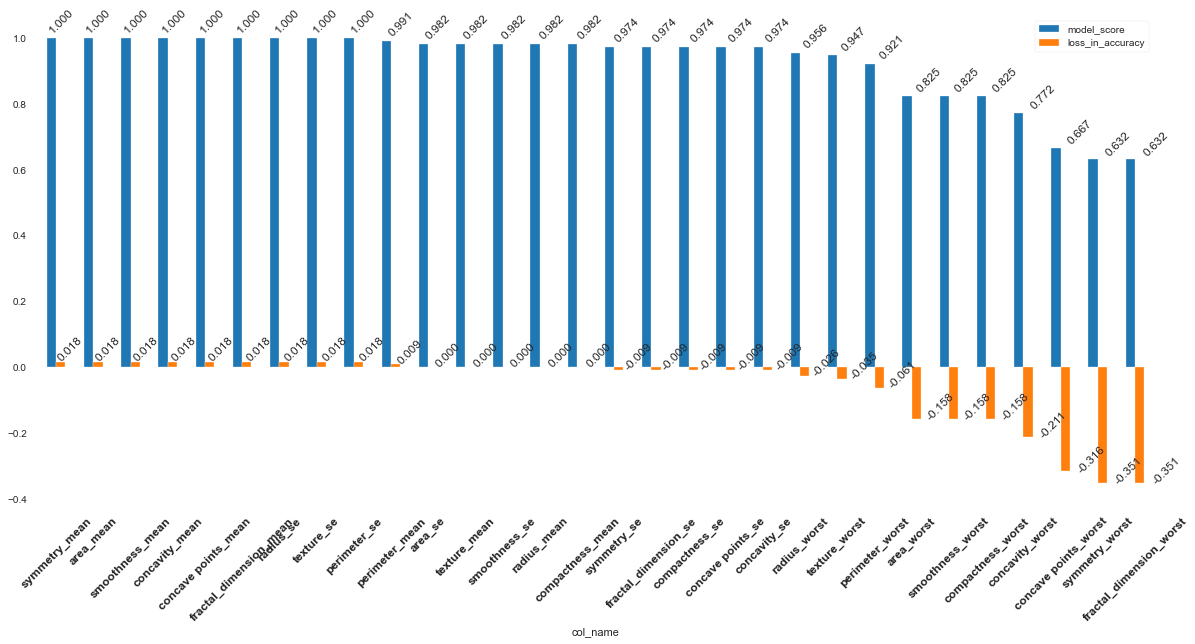

In [20]:
error_feature_ranking= pd.DataFrame(res_,columns=['col_name','model_score','loss_in_accuracy']).sort_values(by='loss_in_accuracy',ascending=False)
plot=error_feature_ranking.set_index('col_name').plot(kind='bar',figsize=(20,9))
plt.xticks(rotation=45,fontsize='large',fontweight='bold')


for p in plot.patches:
    plt.text(*(p.get_x() * 1.015, p.get_height() * 1.015),"%.3f" % float(p.get_height()), rotation=45,fontsize='large')
    #plot.annotate(str(p.get_height()), (p.get_x() * 1.015, p.get_height() * 1.015))

#disrupted_feature_ranking = pd.concat([pd.DataFrame(res,columns=['feature','score','loss']),] ).sort_values(by='loss',ascending=False).drop('score',axis=1)

In [21]:
def do_experiment(clf,X_test,y_test,feature_cols):
    
    data_corruptor = DataCorruptor(X_test,feature_cols)
    total_cells = X_test.shape[0] * X_test.shape[1]
    res= []
    for n in range(total_cells):
            #print(y_test)
            corrupted_score = clf.score(data_corruptor.get_dataset_with_corrupted_cell(), y_test)
            res.append([(n/total_cells),corrupted_score])
    df = pd.DataFrame(res,columns=['%Corrupted','Score'])
    
    print('Area under the curve {}'.format(np.trapz(df['Score'],df['%Corrupted'])))
    return df


In [22]:
experiment_df = do_experiment(clf,X_test,y_test,feature_cols)
expeirment_df_rfe = do_experiment(clf_rfe,X_test_rfe,y_test,top_5_rfe)
expeirment_df_forward = do_experiment(clf_forward,X_test_forward,y_test,top_5_forward)
expeirment_df_backward = do_experiment(clf_backward,X_test_backward,y_test,top_5_backward)
experiment_df_5_error = do_experiment(clf_rfe_top5_error,X_test_5_error,y_test,top_5_error_ranking)
experiment_df_10_error = do_experiment(clf_rfe_top10_error,X_test_10_error,y_test,top_10_error_ranking)

Area under the curve 0.8917282240689444
Area under the curve 0.854970760233918
Area under the curve 0.8621498922745461
Area under the curve 0.8344490612496153
Area under the curve 0.8353031702062172
Area under the curve 0.8228801169590643


- Base case :  0.622609520878219
- RFE :  0.6459449061249616
- Top 5 Error :  0.6499461372730071
- Top 10 Error :  0.710299322868575

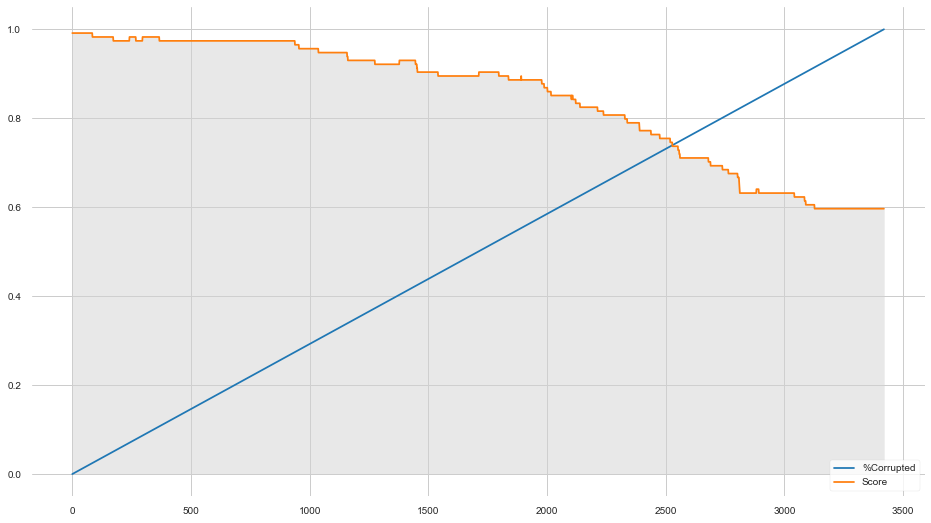

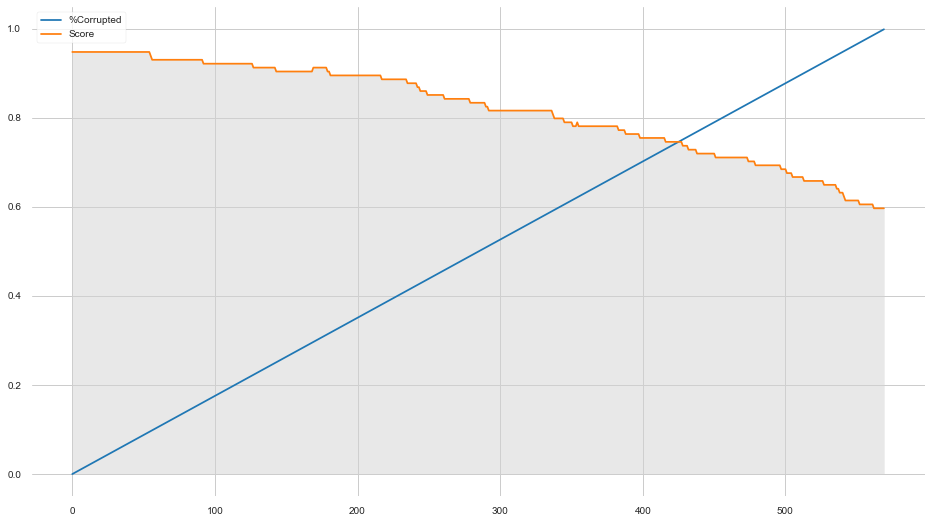

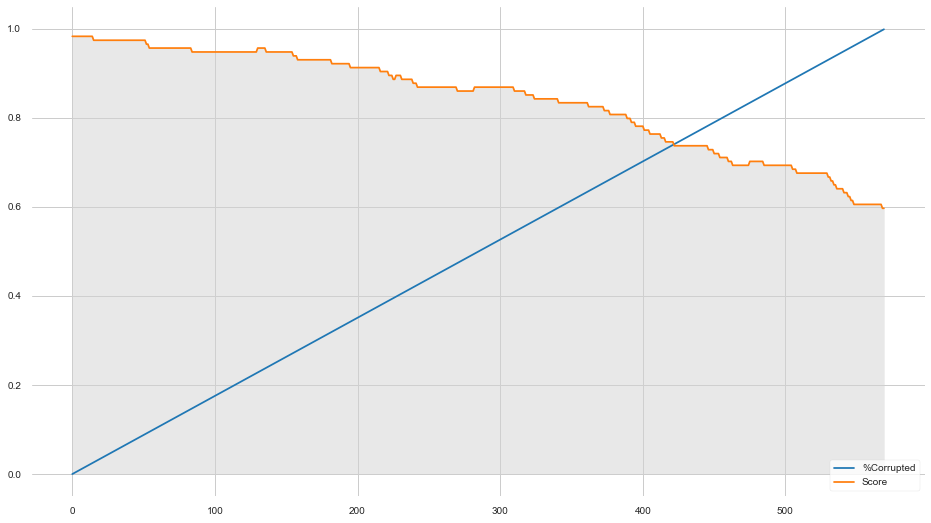

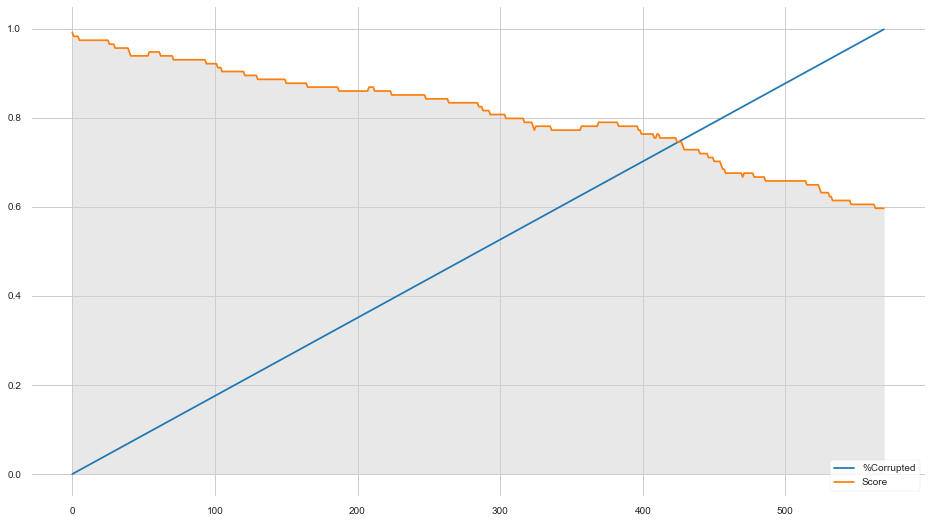

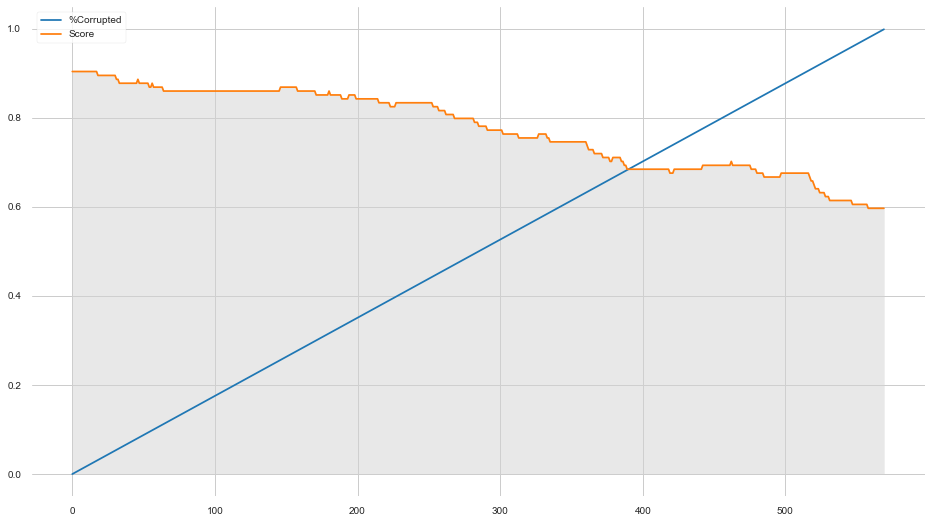

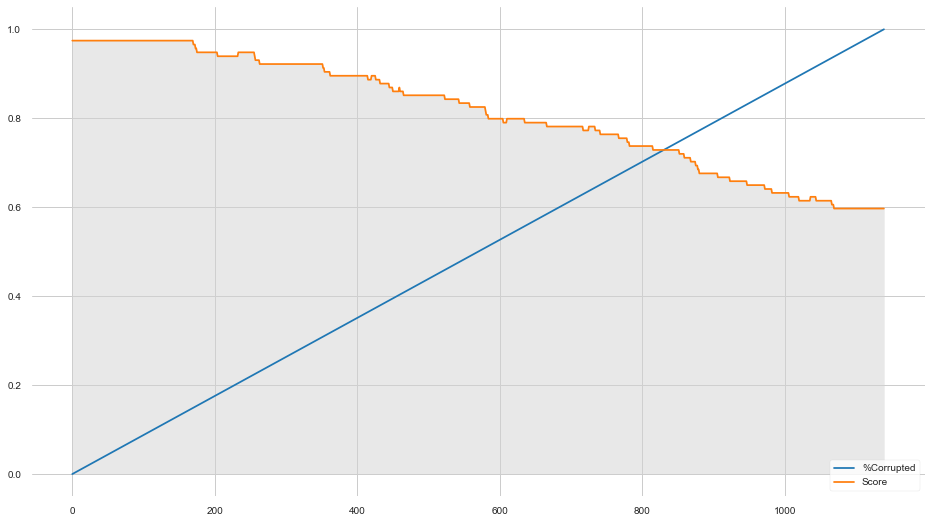

In [24]:
experiment_df.plot(figsize=(16,9),grid=True,linestyle='-').fill_between(experiment_df.index,experiment_df['Score'],color='lightgrey',alpha=0.5)

expeirment_df_rfe.plot(figsize=(16,9),grid=True,linestyle='-').fill_between(expeirment_df_rfe.index,expeirment_df_rfe['Score'],color='lightgrey',alpha=0.5)
expeirment_df_forward.plot(figsize=(16,9),grid=True,linestyle='-').fill_between(expeirment_df_forward.index,expeirment_df_forward['Score'],color='lightgrey',alpha=0.5)
expeirment_df_backward.plot(figsize=(16,9),grid=True,linestyle='-').fill_between(expeirment_df_backward.index,expeirment_df_backward['Score'],color='lightgrey',alpha=0.5)

experiment_df_5_error.plot(figsize=(16,9),grid=True,linestyle='-').fill_between(experiment_df_5_error.index,experiment_df_5_error['Score'],color='lightgrey',alpha=0.5)
experiment_df_10_error.plot(figsize=(16,9),grid=True,linestyle='-').fill_between(experiment_df_10_error.index,experiment_df_10_error['Score'],color='lightgrey',alpha=0.5)

In [20]:
def split_fit_corrupt_measure(X,train_index,test_index,list_without_feature):
    X_train, X_test = X[list_without_feature].iloc[train_index], X[list_without_feature].iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    fitted_pipeline = get_pipeline(X_train).fit(X_train,y_train)

    #print([x[:5] for x in list_without_feature],)
    return measure_error_auc(fitted_pipeline,
                  X_test,
                  y_test,
                  list_without_feature)



def measure_error_auc(clf,X_test,y_test,feature_cols):

    data_corruptor = DataCorruptor(X_test,feature_cols)
    total_cells = X_test.shape[0] * X_test.shape[1]
    res= []
    for n in range(total_cells):
            corrupted_score = clf.score(data_corruptor.get_dataset_with_corrupted_cell(), y_test)
            res.append([(n/total_cells),corrupted_score])
    df = pd.DataFrame(res,columns=['%Corrupted','Score'])

    #print('Area under the curve {}'.format(np.trapz(df['Score'],df['%Corrupted'])))
    return np.trapz(df['Score'],df['%Corrupted'])   

In [ ]:
from itertools import compress as mask_arr
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import KFold
import multiprocessing as mp
mp.set_start_method('spawn',force=True)

def error_backward_selection(X,y):
    res_dict = {}
    kf = KFold(n_splits=10)
    initial_features = X.columns.tolist()
    selected_features =initial_features[:] #Copy
    candidates_to_remove = selected_features

    #CV of the base feature representation
    #base_res= np.array([])
    #for train_index, test_index in kf.split(X):
    #    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    #    y_train, y_test = y[train_index], y[test_index]
    #    fitted_pipeline = get_pipeline(X_train).fit(X_train,y_train)
    #    auc_score = measure_error_auc(fitted_pipeline,
    #                      X_test,
    #                      y_test,
    #                      X.columns.tolist())
    #    base_res =np.append(base_res,auc_score)
    #    print('baseline auc: {}'.format(auc_score))
    #print("Baseline averaage error AUC score after CV {}".format(base_res.mean()))
    for feature in candidates_to_remove:
        pool = mp.Pool(mp.cpu_count()-1)
        mask = [0 if x is feature else 1 for x in candidates_to_remove]
        list_without_feature = list(mask_arr(selected_features,mask))
        
        results = []
        def log_result(x):
            print('sd')
            results.append(x)
        #Cross Validate
        tmp_res =np.array([])
        for train_index, test_index in kf.split(X):
            #print("TRAIN:", train_index, "TEST:", test_index)
            pool.apply_async(split_fit_corrupt_measure, args=(X,train_index,test_index,list_without_feature), callback = log_result)
            #X_train, X_test = X[list_without_feature].iloc[train_index], X[list_without_feature].iloc[test_index]
            #y_train, y_test = y[train_index], y[test_index]
            
            #fitted_pipeline = get_pipeline(X_train).fit(X_train,y_train)
            
            #print([x[:5] for x in list_without_feature],)
            #representation_auc  = measure_error_auc(fitted_pipeline,
            #              X_test,
            #              y_test,
            #              list_without_feature)
            #tmp_res = np.append(tmp_res,representation_auc)
        # Close the pool for new tasks
        pool.close()

        # Wait for all tasks to complete at this point
        pool.join()
        print([x[:5] for x in list_without_feature], results)


     

        
error_backward_selection(X,y)    

Picking high k for Kfold validation helps to stabilize the scores 

5-fold validation scores
0.6187251411489927
0.6242285033968857
0.6173170104296546
0.6233347466250512
0.6515760685591371

10-Fold Validation scores:
0.6361854497877946
0.6268862124047063
0.6437379181820466
0.6437379181820466
0.6316132032318159
0.6316132032318159

In [ ]:
class AccErrorSelection:
    def __init__(self,data,target,model=None):
        self.data = data.copy()
        self.target = target
        self.model = model
        
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(data,target, test_size=0.20)
        self.clean_test_baseline_score = self.measure_model_performance(self.X_train, self.X_test, self.y_train, self.y_test) #TODO: 
        
        self.error_test_baseline_score = self.measure_error_auc(self.get_pipeline(self.X_train).fit(self.X_train,self.y_train),
                                                                self.X_test,
                                                                self.y_test,
                                                                data.columns.tolist())
        
        self.best_acc_features = [] # List of features that has perfomed best wrt to accuracy of the model (or OLS)
        self.best_error_features = [] # List of features that hes perfomed best wrt to error score

    def measure_error_auc(self,clf,X_test,y_test,feature_cols):
    
        data_corruptor = DataCorruptor(X_test,feature_cols)
        total_cells = X_test.shape[0] * X_test.shape[1]
        res= []
        for n in range(total_cells):
                corrupted_score = clf.score(data_corruptor.get_dataset_with_corrupted_cell(), y_test)
                res.append([(n/total_cells),corrupted_score])
        df = pd.DataFrame(res,columns=['%Corrupted','Score'])

        #print('Area under the curve {}'.format(np.trapz(df['Score'],df['%Corrupted'])))
        return np.trapz(df['Score'],df['%Corrupted'])

        
    def measure_model_performance(self,X_train,X_test,y_train,y_test):
        """ This helping function is used to retrive the perfomnace of the the model for a given feature representation. 
            It does retrive the pipeline, fit it with train data and evaluate performance    
        """
        pipeline = self.get_pipeline(X_train)    
        pipeline.fit(X_train,y_train)
        return pipeline.score(X_test,y_test)

    def get_feature_representations(feature_list_to_trim, feature_to_remove):
        
        pass
        
        
    def forward_selection(self,significance_level=0.05):
        initial_features = self.data.columns.tolist()
        best_features = []
        while (len(initial_features)>0):
            remaining_features = list(set(initial_features)-set(best_features))
            new_pval = pd.Series(index=remaining_features)
            for new_column in remaining_features:
                features_with_constant = sm.add_constant(self.data[best_features+[new_column]])
                model = sm.OLS(self.target, features_with_constant).fit()
                new_pval[new_column] = model.pvalues[new_column]
            min_p_value = new_pval.min()
            if(min_p_value<significance_level):
                best_features.append(new_pval.idxmin())
            else:
                break
        return best_features

        
    
    
    def backward_elimination(self,full_feature_list, significance_level = 0.05):
        features = full_feature_list 
        results_dict = {}
        score = self.measure_error_auc(self.get_pipeline(self.X_train[features]).fit(self.X_train[features],self.y_train),self.X_test[features],self.y_test,features)

        for feature in full_feature_list:            
                tmp_features=features
                tmp_features.remove(feature)
                auc = self.measure_error_auc(self.get_pipeline(self.X_train[tmp_features]).fit(self.X_train[tmp_features],self.y_train),self.X_test[tmp_features],self.y_test,tmp_features)
                results_dict[repr(tmp_features)] = auc
        #        features.remove(excluded_feature)

        return features

    def prepare_error_ranking(self,corruption_degree=0.95):
        """ This function creates the initial ranking for of the features.
            The ranking is created by corrupting every coolumn on by one and evaluation the perfomance drop for each corruption. 
            Corruption is parametrisable.
            corruption_degree type: int 
        """
        feature_stats = self.data.describe().T[['mean', 'std', 'max', 'min']]
        feature_cols = self.data.columns.to_list()
        data_corruptor = DataCorruptor(self.X_test,feature_cols,feature_stats)
        pipeline_model = self.get_pipeline(self.X_train,model=self.model)
        pipeline_model.fit(self.X_train,self.y_train)
        res_= []
        print('Feature Ranking Error')
        for idx,column in enumerate(feature_cols):
            corrupted_score = pipeline_model.score(data_corruptor.get_dataset_with_corrupted_col(column), self.y_test)
            loss = corrupted_score - self.clean_test_baseline_score
            res_.append([column,corrupted_score,loss])
            print("model score: %.3f" % corrupted_score)
        return res_
        
        

    
    

In [ ]:
import statsmodels.api as sm
aes = AccErrorSelection(X,y)

aes.forward_selection()
    

In [ ]:
aes.prepare_error_ranking()

In [ ]:
aes.error_test_baseline_score

In [ ]:
aes.clean_test_baseline_score

In [ ]:
aes.backward_elimination(aes.data.columns.tolist())

Foward selecton 



In [1]:
!conda uninstall matplotlib

Solving environment: failed

PackagesNotFoundError: The following packages are missing from the target environment:
  - matplotlib




In [13]:
import numpy as np
print(np.array([['lol',4],['bol',2], ['torl',3]]).sort())



None
